In [1]:
!pip install -q google-generativeai


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google.generativeai as genai
from google import genai
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading gemini api key
load_dotenv()
API_KEY = os.getenv("GEMINI_API_KEY")

# validate api key
if not API_KEY:
    raise ValueError("API key not found. Please add it to your .env file.")

# configure gemini api key
genai.configure(api_key=API_KEY)

# model initialization
model = genai.GenerativeModel('gemini-2.5-flash')

In [32]:
# Prompt functions
client = genai.Client()

def generate_response(prompt):
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        print(f"API error: {e}")
        return "unknown"
    
def generate_image_response(image_path, prompt):
    try:
        uploaded_file = client.files.upload(file=image_path)

        response = client.models.generate_content(
            model = "gemini-2.5-flash",
            contents = [uploaded_file, prompt]
        )
        
        return response.text.strip()
    except Exception as e:
        print(f"API error: {e}")
        return "unknown"

In [21]:
# testing the ai
prompt="what is the gemini model I am using right now?"
generate_response(prompt)

"As a large language model, I am trained by Google.\n\nI am currently a **Gemini model**.\n\nThe exact version or variant (e.g., Gemini Pro, Gemini Ultra, or a specific numbered version like 1.0, 1.5, etc.) can sometimes depend on the specific application or platform you're using (e.g., `gemini.google.com`, the Google AI Studio, or an API call), and Google continually updates and refines these models.\n\nHowever, when you interact with me, you are interacting with a sophisticated version within the Gemini family designed for a wide range of conversational and informational tasks."

In [6]:
df = pd.read_csv("dataset\kidney_disease_dataset.csv")
df

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
0,71,0.30,40.9,0,1,46.8,1622.0,1,0
1,34,1.79,17.1,0,0,43.8,1428.0,1,0
2,80,2.67,15.0,0,1,78.2,1015.0,1,0
3,40,0.97,31.1,0,1,92.8,1276.0,1,0
4,43,2.05,22.8,1,1,62.2,1154.0,0,0
...,...,...,...,...,...,...,...,...,...
2299,89,1.11,5.0,1,0,55.1,1344.0,1,0
2300,89,0.30,5.0,0,0,47.5,2156.0,1,0
2301,84,0.30,7.3,1,0,120.0,1353.0,0,0
2302,24,1.58,26.4,1,0,75.6,1067.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2304 non-null   int64  
 1   Creatinine_Level  2304 non-null   float64
 2   BUN               2304 non-null   float64
 3   Diabetes          2304 non-null   int64  
 4   Hypertension      2304 non-null   int64  
 5   GFR               2304 non-null   float64
 6   Urine_Output      2304 non-null   float64
 7   CKD_Status        2304 non-null   int64  
 8   Dialysis_Needed   2304 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 162.1 KB


In [8]:
df.isna().sum()

Age                 0
Creatinine_Level    0
BUN                 0
Diabetes            0
Hypertension        0
GFR                 0
Urine_Output        0
CKD_Status          0
Dialysis_Needed     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Age,Creatinine_Level,BUN,Diabetes,Hypertension,GFR,Urine_Output,CKD_Status,Dialysis_Needed
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,54.159288,1.305638,18.813672,0.406684,0.498264,68.953863,1309.189670,0.508681,0.013455
std,20.513729,0.789594,10.508358,0.491322,0.500106,24.660191,491.951914,0.500033,0.115237
min,20.000000,0.300000,5.000000,0.000000,0.000000,5.000000,100.000000,0.000000,0.000000
25%,36.000000,0.620000,9.975000,0.000000,0.000000,51.300000,967.750000,0.000000,0.000000
50%,54.000000,1.240000,18.200000,0.000000,0.000000,69.150000,1295.500000,1.000000,0.000000
75%,72.000000,1.842500,26.000000,1.000000,1.000000,86.300000,1633.500000,1.000000,0.000000
max,90.000000,4.130000,61.900000,1.000000,1.000000,120.000000,2899.000000,1.000000,1.000000


Exploratory Data Analysis

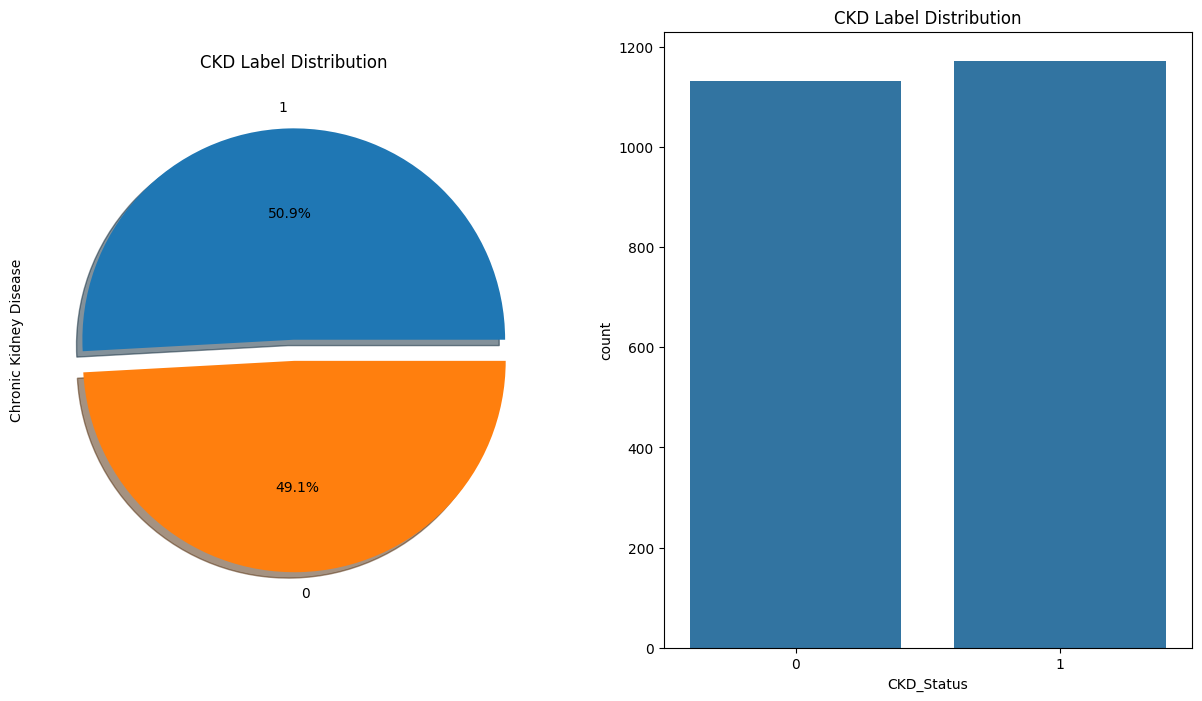

In [11]:
f, ax = plt.subplots(1, 2, figsize= (15,8))

df['CKD_Status'].value_counts().plot.pie(explode=[0,0.1], autopct= '%1.1f%%', ax= ax[0], shadow= True)

ax[0].set_title('CKD Label Distribution')
ax[0].set_ylabel('Chronic Kidney Disease')

sns.countplot(x = 'CKD_Status', data= df, ax= ax[1])
ax[1].set_title('CKD Label Distribution')
plt.show()

This dataset has record if the patient has diabetes or not. Let's see if diabetes is associated with CKD risk

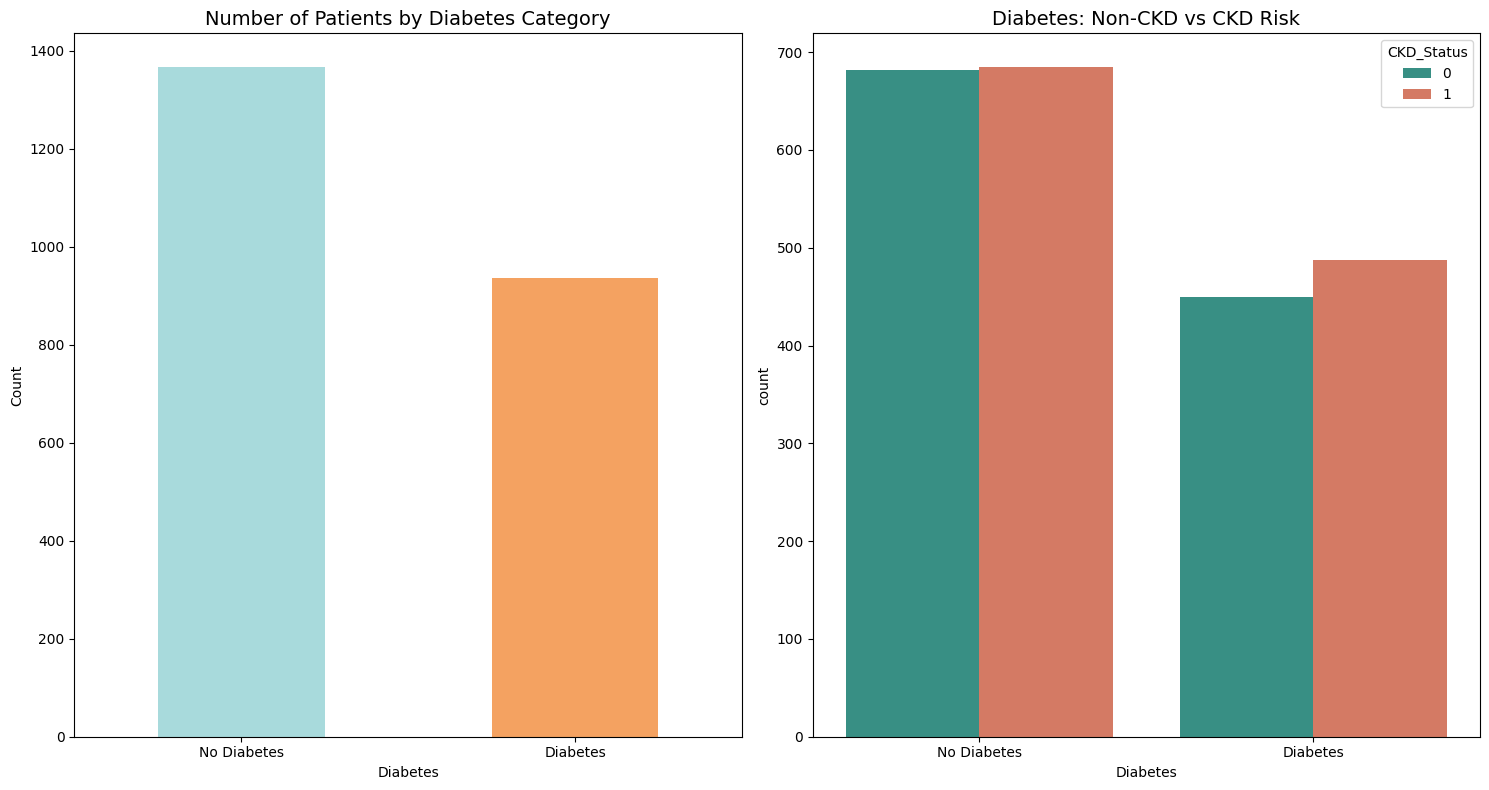

In [ ]:
import base64
from io import BytesIO

# custom color palette for diabetes categories
custom_palette = {1: '#E76F51', 0: '#2A9D8F'}

# create subplots
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot 1: bar chart of patient with diabetes counts
diabetes_counts = df['Diabetes'].value_counts()
diabetes_counts.plot.bar(
    color=['#A8DADC', '#F4A261'],
    ax=axes[0]
)
axes[0].set_title('Number of Patients by Diabetes Category', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation= 0)

# Plot 2: Countplot showing CKD status by diabetes
sns.countplot(
    x= 'Diabetes',
    hue= 'CKD_Status',
    data=df,
    palette= custom_palette,
    ax=axes[1]
)
axes[1].set_title('Diabetes: Non-CKD vs CKD Risk', fontsize= 14)
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

Patient's Creatinine Level Category & Risk Factor

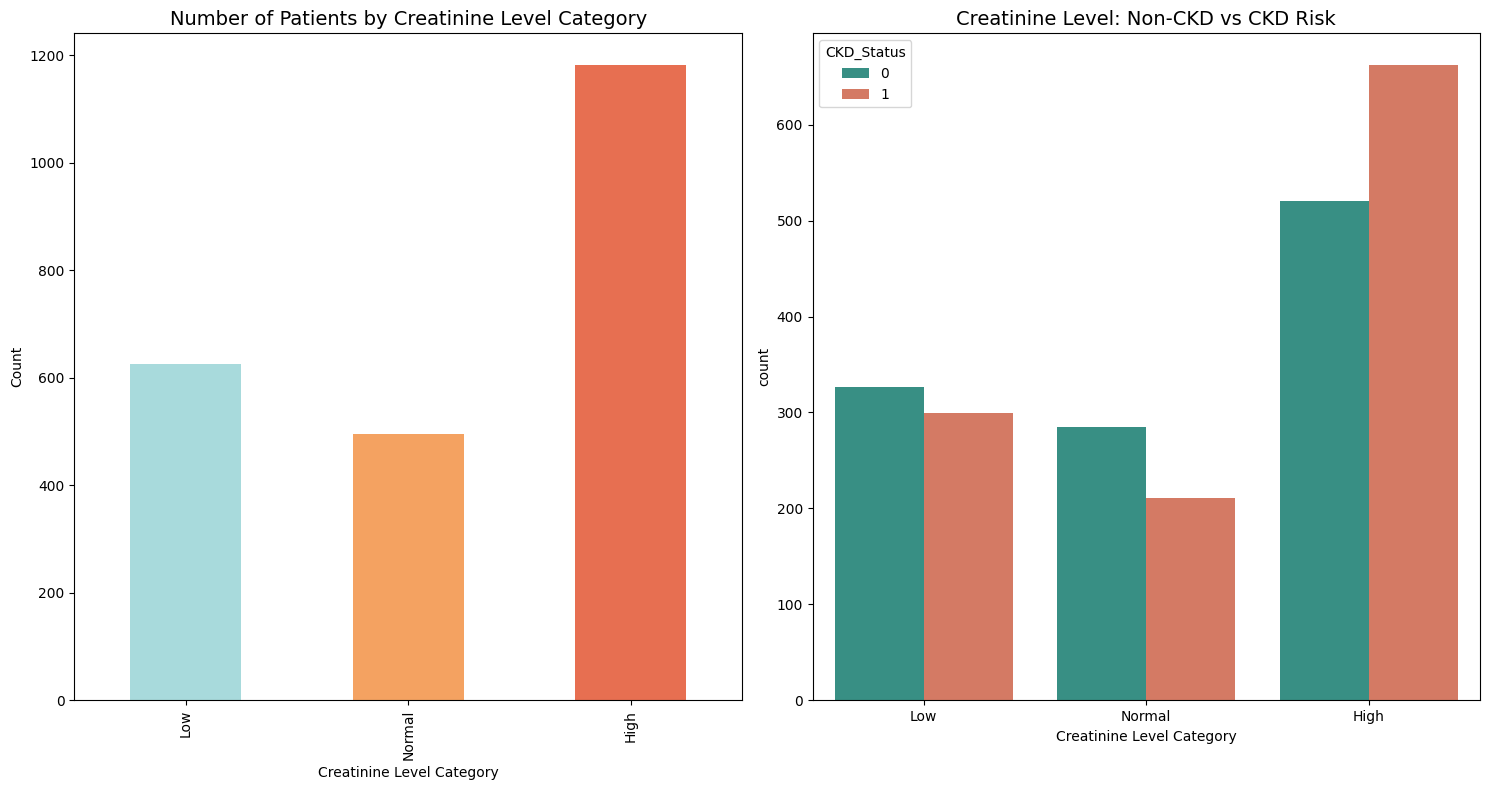

In [13]:
# Function to categorize creatinine levels
def categorize(value):
    if value < 0.7:
        return 'Low'
    elif 0.7 <= value <= 1.2:
        return 'Normal'
    else:
        return 'High'
    
# Apply categorization
df['CL_category'] = df['Creatinine_Level'].apply(categorize)

category_colors = ['#A8DADC', '#F4A261', '#E76F51']

# Create subplots
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(15, 8))

# Plot 1: Bar chart of creatinine level categories
cl_counts = df['CL_category'].value_counts().reindex(['Low', 'Normal', 'High'])
cl_counts.plot.bar(
    color=category_colors,
    ax= axes[0]
)
axes[0].set_title("Number of Patients by Creatinine Level Category", fontsize= 14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Creatinine Level Category')

# Plot 2: Countplot showing CKD status by CL category
sns.countplot(
    x= 'CL_category',
    hue= 'CKD_Status',
    data= df,
    order= ['Low', 'Normal', 'High'],
    palette= custom_palette,
    ax= axes[1]
)
axes[1].set_title('Creatinine Level: Non-CKD vs CKD Risk', fontsize= 14)
axes[1].set_xlabel('Creatinine Level Category')

plt.tight_layout()
plt.show()

Patient's BUN Level Category & Risk Factor

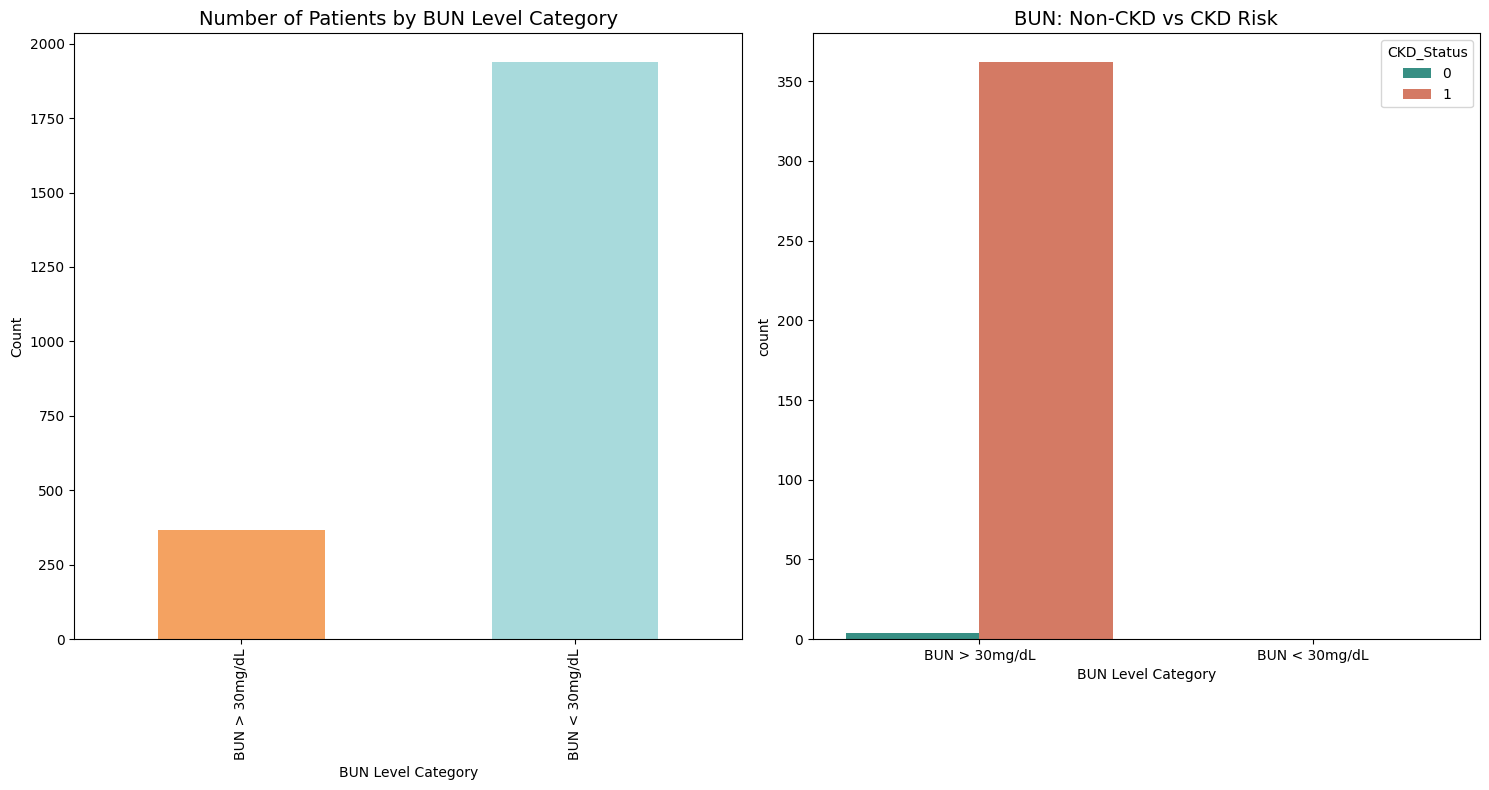

In [14]:
# Function to categorize BUN levels
def categorize(value):
    return 'BUN > 30mg/dL' if value >= 30 else 'BUN < 30mg/dL'

# apply categorization
df['BUN_category'] = df['BUN'].apply(categorize)

bun_colors = ['#F4A261', '#A8DADC']

# create subplots
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (15, 8))

# Plot 1: Bar chart of BUN categories
bun_counts = df['BUN_category'].value_counts().reindex(['BUN > 30mg/dL', 'BUN < 30mg/dL'])
bun_counts.plot.bar(
    color = bun_colors,
    ax=axes[0]
)
axes[0].set_title('Number of Patients by BUN Level Category', fontsize= 14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('BUN Level Category')
axes[0].set_xticklabels(['BUN > 30mg/dL', 'BUN < 30mg/dL'])

# Plot 2: Countplot showing CKD status by BUN category
sns.countplot(
    x = 'BUN_category', 
    hue = 'CKD_Status', 
    data = df,
    order = ['BUN > 30mg/dL', "BUN < 30 mg/dL"],
    palette = custom_palette,
    ax = axes[1]
)
axes[1].set_title('BUN: Non-CKD vs CKD Risk', fontsize= 14)
axes[1].set_xlabel('BUN Level Category')
axes[1].set_xticklabels(['BUN > 30mg/dL', 'BUN < 30mg/dL'])

plt.tight_layout()
plt.show()

Patient's GFR Category & Risk Factor

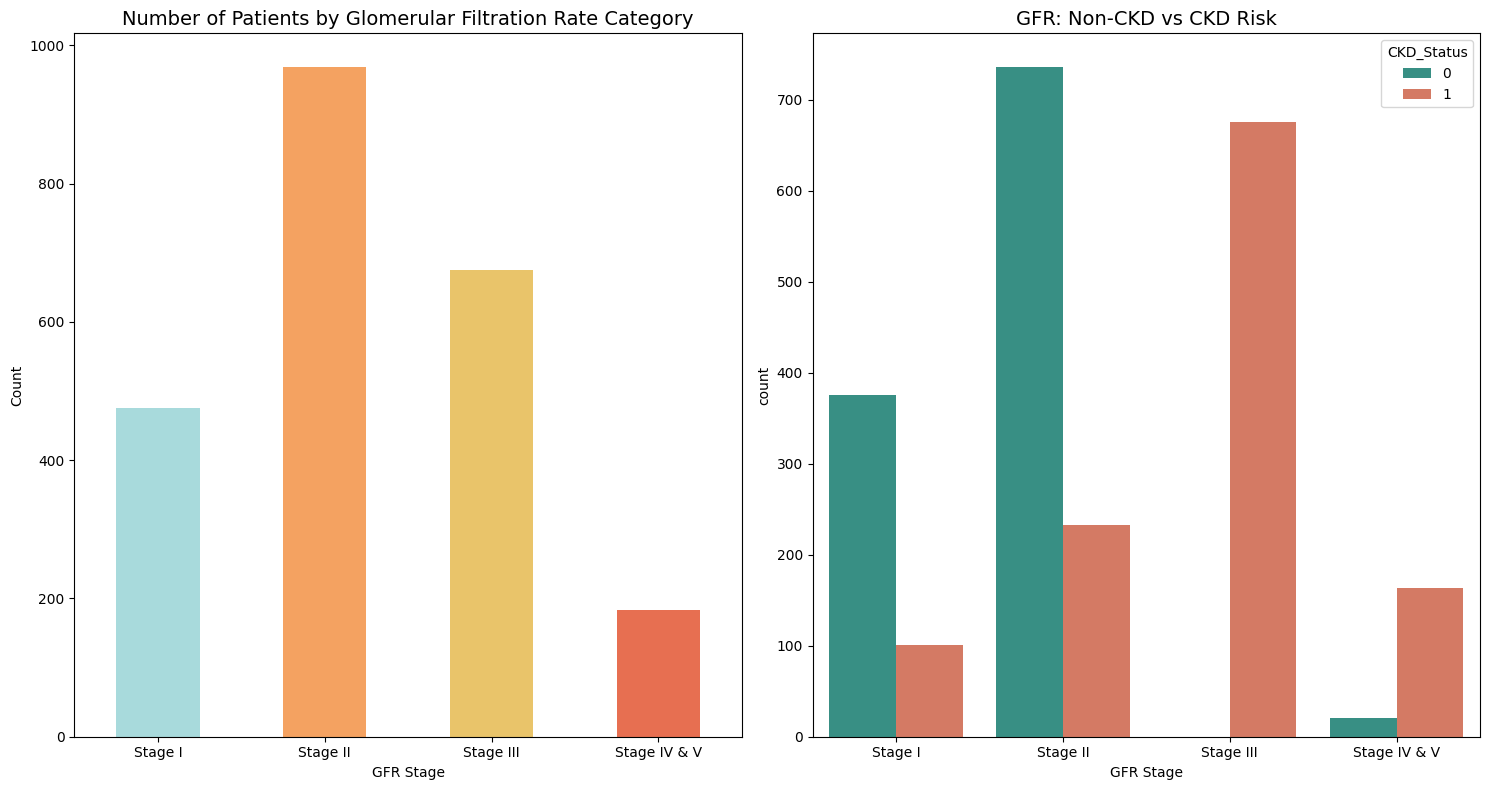

In [15]:
# function to categorize GFR into medical stages
def categorize(value):
    if value >= 90:
        return 'Stage I'
    elif 60 <= value <= 89:
        return 'Stage II'
    elif 30 <= value <= 59:
        return 'Stage III'
    else:
        return 'Stage IV & V'
    
# Apply categorization
df['GFR_Level'] = df['GFR'].apply(categorize)

# define color paelette for GFR stages
gfr_colors = ['#A8DADC', '#F4A261', '#E9C46A', '#E76F51']

# define consistent order of stages
gfr_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV & V']

# create subplots
fix, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1: Bar plot of patient counts by GFR stage
gfr_counts = df['GFR_Level'].value_counts().reindex(gfr_order)
gfr_counts.plot.bar(
    color = gfr_colors,
    ax = axes[0]
)
axes[0].set_title('Number of Patients by Glomerular Filtration Rate Category', fontsize= 14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('GFR Stage')
axes[0].set_xticklabels(gfr_order, rotation= 0)

# Plot 2: Countplot of CKD risk per GFR stage
sns.countplot(
    x = 'GFR_Level',
    hue = 'CKD_Status',
    data = df,
    order = gfr_order,
    palette = custom_palette,
    ax = axes[1]
)
axes[1].set_title('GFR: Non-CKD vs CKD Risk', fontsize= 14)
axes[1].set_xlabel('GFR Stage')
axes[1].set_xticklabels(gfr_order)

plt.tight_layout()
plt.show()

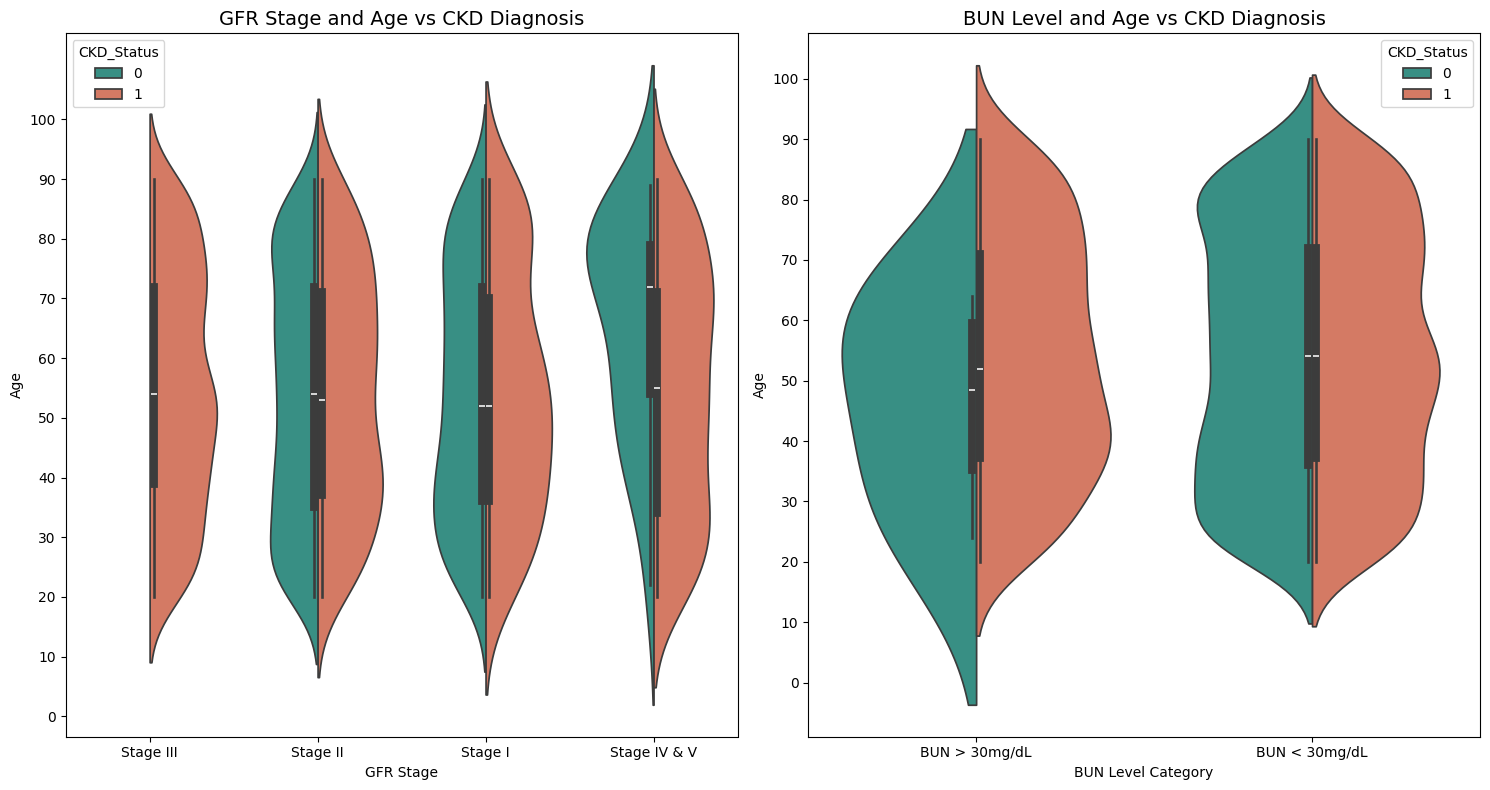

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Violin Plot 1: Age vs GFR Level
sns.violinplot(
    x = 'GFR_Level',
    y = 'Age',
    hue = 'CKD_Status', 
    data = df,
    split = True,
    palette = custom_palette,
    ax = axes[0]
)
axes[0].set_title('GFR Stage and Age vs CKD Diagnosis', fontsize= 14)
axes[0].set_ylabel('Age')
axes[0].set_yticks(range(0, 110, 10))
axes[0].set_xlabel('GFR Stage')

# Violint Plot 2: Age vs BUN Category
sns.violinplot(
    x = 'BUN_category',
    y = 'Age', 
    hue = 'CKD_Status',
    data = df,
    split = True,
    palette = custom_palette,
    ax = axes[1]
)
axes[1].set_title('BUN Level and Age vs CKD Diagnosis', fontsize= 14)
axes[1].set_ylabel('Age')
axes[1].set_yticks(range(0, 110, 10))
axes[1].set_xlabel('BUN Level Category')

plt.tight_layout()
plt.show()

Modelling the Machine Learning

In [42]:
X = df.drop(columns=['CKD_Status', 'CL_category', 'GFR_Level', 'BUN_category'])
y = df['CKD_Status']

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns= X.columns)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state= 42)

model = RandomForestClassifier(n_estimators= 100, random_state= 42)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nTesting Accuracy : {:.2f}%".format(accuracy*100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Testing Accuracy : 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       1.00      1.00      1.00       344

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692

